# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [213]:
import pandas as pd
import numpy as np
%matplotlib inline

## Read in the file `craftcans.csv`, and look at the first first rows

In [219]:
df = pd.read_csv("craftcans.csv", na_values=['Does not apply'])
df.head()
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80.0
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.70%,25.0
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42.0


## How many rows do you have in the data? What are the column types?

In [220]:
df.shape

(2416, 7)

In [221]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [222]:
df.Brewery.value_counts().sort_values(ascending=False).head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
SanTan Brewing Company        19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [223]:
df.ABV.value_counts().head(1)

5.00%    215
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [224]:
df.ABV.isna().value_counts()

False    2348
True       68
Name: ABV, dtype: int64

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [225]:
df['ABV'] = df.ABV.str.replace("%", "")

#df[df.ABV.notnull()]
#.ABV.str.replace("%", "")

In [226]:
df.ABV.value_counts()

5.00     215
5.50     158
6.00     125
6.50     123
5.20     107
7.00      92
4.50      89
4.80      72
5.60      66
5.80      66
5.10      62
5.30      60
4.90      59
6.20      59
4.70      57
8.00      57
5.70      52
6.80      52
5.40      50
7.50      43
6.30      38
4.00      38
4.20      38
7.20      37
9.90      35
5.90      34
4.60      32
6.90      32
8.50      26
6.70      25
        ... 
9.50       9
4.10       9
8.30       8
7.40       8
7.90       7
3.50       6
3.80       6
8.80       6
7.60       5
9.70       5
9.60       5
9.30       5
8.10       4
8.60       4
3.70       4
9.80       3
3.20       3
8.40       3
9.10       3
2.70       2
8.90       2
9.40       1
10.40      1
12.00      1
3.40       1
2.80       1
0.10       1
12.80      1
10.00      1
12.50      1
Name: ABV, Length: 74, dtype: int64

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [227]:
df['ABV'] = df['ABV'].astype(float)

In [228]:
df.ABV.value_counts()

5.0     215
5.5     158
6.0     125
6.5     123
5.2     107
7.0      92
4.5      89
4.8      72
5.8      66
5.6      66
5.1      62
5.3      60
6.2      59
4.9      59
8.0      57
4.7      57
5.7      52
6.8      52
5.4      50
7.5      43
4.0      38
6.3      38
4.2      38
7.2      37
9.9      35
5.9      34
6.9      32
4.6      32
8.5      26
6.7      25
       ... 
4.1       9
9.5       9
7.4       8
8.3       8
7.9       7
8.8       6
3.8       6
3.5       6
7.6       5
9.6       5
9.3       5
9.7       5
3.7       4
8.1       4
8.6       4
3.2       3
9.1       3
8.4       3
9.8       3
8.9       2
2.7       2
3.4       1
12.5      1
10.0      1
10.4      1
0.1       1
12.0      1
2.8       1
9.4       1
12.8      1
Name: ABV, Length: 74, dtype: int64

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [229]:
df.ABV.median() 
#
#df.ABV.describe()

5.6

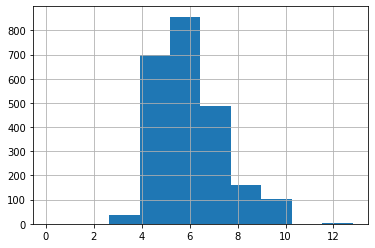

In [230]:
df.ABV.hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [231]:
df.ABV.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2386    False
2387    False
2388    False
2389    False
2390    False
2391    False
2392    False
2393    False
2394    False
2395    False
2396    False
2397    False
2398    False
2399    False
2400    False
2401    False
2402    False
2403    False
2404    False
2405    False
2406    False
2407    False
2408    False
2409    False
2410    False
2411    False
2412    False
2413    False
2414    False
2415    False
Name: ABV, Length: 2416, dtype: bool

In [232]:
df.ABV.isnull().sum()

68

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [233]:
df.Location.value_counts().sort_values(ascending=False).head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [234]:
df[df.Location == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [235]:
Brooklyn_brew = df[df.Location == 'Brooklyn, NY']


In [236]:
Brooklyn_brew.Brewery.value_counts()

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

In [237]:
Brooklyn_brew.Brewery.value_counts().head(1)

Sixpoint Craft Ales    24
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [238]:
Sixpoint = Brooklyn_brew[Brooklyn_brew.Brewery == 'Sixpoint Craft Ales']
Sixpoint.Style.value_counts().head()

American IPA       4
Rye Beer           2
Baltic Porter      2
Cream Ale          2
German Pilsener    2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [239]:
df = df.dropna(subset=['Location'])
df[df.Location.str.contains('NY')]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
598,8 Barrel,Chatham Brewing,"Chatham, NY",American Strong Ale,16 oz.,8.0,69.0
599,Oktoberfest,Chatham Brewing,"Chatham, NY",Märzen / Oktoberfest,16 oz.,5.5,40.0
628,Cream Ale,Newburgh Brewing Company,"Newburgh, NY",Cream Ale,12 oz.,4.2,35.0


### Now *count* all of the breweries in New York state

In [240]:
New_York = df[df.Location.str.contains('NY')]
New_York.groupby(by='Brewery').count()

,Beer,Location,Style,Size,ABV,IBUs
Brewery,,,,,,
Blue Point Brewing Company,4,4,4,4,4,3
Bomb Beer Company,2,2,2,2,2,1
Brooklyn Brewery,6,6,6,6,6,2
Butternuts Beer and Ale,4,4,4,4,4,0
Chatham Brewing,2,2,2,2,2,2
Dundee Brewing Company,1,1,1,1,1,1
Evil Twin Brewing,5,5,5,5,5,0
KelSo Beer Company,3,3,3,3,3,3
Matt Brewing Company,13,13,13,13,13,3


In [241]:
New_York.groupby(by='Brewery').count().shape

(16, 6)

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [242]:
df=df.dropna(subset=['Style'])

In [243]:
df[df.Style.isna()]

,Beer,Brewery,Location,Style,Size,ABV,IBUs


In [244]:
df[df.Style.str.contains('IPA')]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
33,Villager,Fort Point Beer Company,"San Francisco, CA",American IPA,12 oz.,6.3,42.0
38,HopArt,COAST Brewing Company,"Charleston, SC",American IPA,16 oz.,7.7,NaN
39,Boy King,COAST Brewing Company,"Charleston, SC",American Double / Imperial IPA,16 oz.,9.7,NaN


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [192]:
# sorry I ran it in the cell below to make it work!

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [248]:
df.IBUs.mean()

42.73984319315752

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

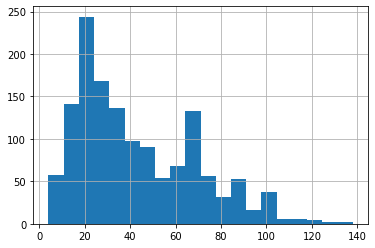

In [246]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [250]:
df.IBUs.describe()

count    1403.000000
mean       42.739843
std        25.962692
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [251]:
df[df.IBUs >= 64.0]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
22,Hoponius Union,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,12 oz.,6.7,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
46,Yeti Imperial Stout,Great Divide Brewing Company,"Denver, CO",Russian Imperial Stout,12 oz.,9.5,75.0


## List all of the beers with IBUs below the 25th percentile

In [268]:
df[df.IBUs <= 21.0]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
11,Flesh Gourd'n,Against the Grain Brewery,"Louisville, KY",Pumpkin Ale,16 oz.,6.6,21.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0
20,Leisure Time,Jack's Abby Craft Lagers,"Framingham, MA",American Pale Lager,12 oz.,4.8,15.0
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0
31,Westfalia,Fort Point Beer Company,"San Francisco, CA",American Amber / Red Ale,12 oz.,5.6,16.0
32,KSA,Fort Point Beer Company,"San Francisco, CA",Kölsch,12 oz.,4.6,17.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [261]:
df.groupby(by='Style').IBUs.median().sort_values(ascending=False)

Style
American Barleywine                    96.0
Russian Imperial Stout                 94.0
American Double / Imperial IPA         91.0
American Double / Imperial Pilsner     85.0
American Black Ale                     73.0
Belgian Strong Dark Ale                72.0
American Strong Ale                    70.0
American IPA                           69.0
English Stout                          66.0
American India Pale Lager              65.0
Belgian IPA                            61.0
English Barleywine                     60.0
Rye Beer                               57.0
Baltic Porter                          52.0
English Strong Ale                     52.0
American Double / Imperial Stout       51.0
English India Pale Ale (IPA)           47.0
American White IPA                     45.0
American Pale Ale (APA)                44.0
Extra Special / Strong Bitter (ESB)    41.0
California Common / Steam Beer         41.0
Old Ale                                40.0
American Stout            

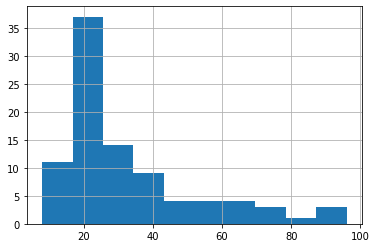

In [266]:
df.groupby(by='Style').IBUs.median().sort_values(ascending=False).hist()

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [277]:
df[df.IBUs >= 64.0].Style.value_counts().head(5)

American IPA                      201
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

In [276]:
df[df.IBUs <= 21.0].Style.value_counts().head(5)

American Pale Wheat Ale    44
American Blonde Ale        40
Fruit / Vegetable Beer     29
Witbier                    21
Hefeweizen                 21
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [286]:
df[(df.Style == 'Witbier') | (df.Style == 'Hefeweizen') | (df.Style == 'American Pale Wheat Ale')].IBUs.mean()

18.982142857142858

In [292]:
#OR
df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])].IBUs.mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

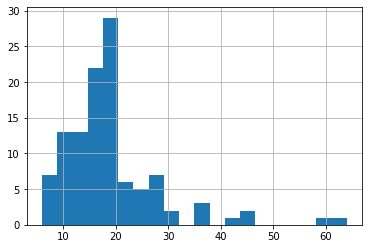

In [296]:
df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])].IBUs.hist(bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [298]:
df[(df.Style.str.contains('IPA', na=False))].IBUs.mean()

71.94897959183673

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

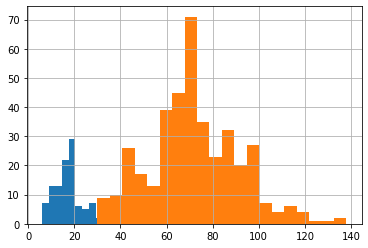

In [302]:
ax = df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])].IBUs.hist(bins=20)
df[df.Style.str.contains('IPA', na=False)].IBUs.hist(ax=ax, bins=20)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

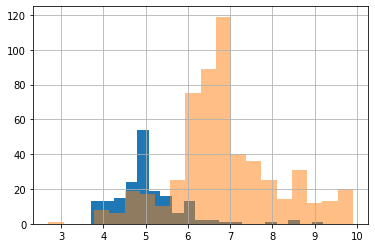

In [305]:
ax = df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])].ABV.hist(bins=20)
df[df.Style.str.contains('IPA', na=False)].ABV.hist(ax=ax, bins=20, alpha=0.5)

## Good work!

If you made it this far you deserve a drink.